In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from plotnine import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import warnings
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
warnings.filterwarnings('ignore')

In [155]:
# Load dataset
Train=pd.read_csv('cs-training.csv').drop('Unnamed: 0',axis=1)
Test=pd.read_csv('cs-test.csv').drop('Unnamed: 0',axis=1)

In [156]:
Test

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
101498,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [157]:
# Before start, fill the missing values
# Here we choose the RandomForestRegressor method;
# Note that only the MonthlyIncome and NumberOfDependents
# colume have missing values

In [158]:
# First fit the MonthlyIncome
# Separate the dataset
df_full=Train.drop(labels=['MonthlyIncome',
                           'NumberOfDependents','SeriousDlqin2yrs'],
                   axis=1)
df_nan=Train.loc[:,'MonthlyIncome']
Ytrain=df_nan[df_nan.notnull()]
Ytest=df_nan[df_nan.isnull()]
Xtrain=df_full.iloc[Ytrain.index]
Xtest=df_full.iloc[Ytest.index]

In [159]:
fitting=RandomForestRegressor(n_estimators=300)
fitting=fitting.fit(Xtrain,Ytrain)
Ypred=fitting.predict(Xtest)

In [160]:
# Finish fitting
df_nan[df_nan.isnull()]=Ypred

In [161]:
dft_full=Test.drop(labels=['MonthlyIncome',
                           'NumberOfDependents','SeriousDlqin2yrs'],
                   axis=1)
dft_nan=Test.loc[:,'MonthlyIncome']
YTtest=dft_nan[dft_nan.isnull()]
XTtest=dft_full.iloc[YTtest.index]
YTpred=fitting.predict(XTtest)
dft_nan[dft_nan.isnull()]=YTpred

In [162]:
# Now fit the NumberOfDependents column.
# Here we just make everything simpler; we fit all the
# missing values as 0, for it is the median and the mode
# of all data

In [163]:
Train=Train.fillna(0)

In [164]:
Test=Test.fillna(0)

In [165]:
# This time, we have made all the missing data fitted properly.

In [166]:
Train.to_csv('Training.csv')
Test.to_csv('Testing.csv')

In [2]:
Train=pd.read_csv('Training.csv').drop('Unnamed: 0',axis=1)
Test=pd.read_csv('Testing.csv').drop('Unnamed: 0',axis=1)

In [3]:
# To begin with, we make some data transformations

In [4]:
#### Next, we begin our classification procedure
## Because the testing dataset has no values in 
## column SeriousDlqin2yrs, so we split the Train into 3 parts:
## training, validation, testing with the ratio 8:1:1.
np.random.seed(1000)
Resample=np.random.choice(150000,150000,replace=False)

In [5]:
Training=Train.iloc[Resample[:135000]].reset_index(drop=True)
Testing=Train.iloc[Resample[135000:]].reset_index(drop=True)

In [6]:
Train_X=Training.drop(labels='SeriousDlqin2yrs',axis=1)
Train_Y=Training.SeriousDlqin2yrs
Testing_X=Testing.drop(labels='SeriousDlqin2yrs',axis=1)
Testing_Y=Testing.SeriousDlqin2yrs

In [7]:
# To begin with, make some transformations

In [8]:
Mean_age=np.mean(Train_X.age)
Std_age=np.std(Train_X.age)
Mean_inc=np.mean(Train_X.MonthlyIncome)
Std_inc=np.mean(Train_X.MonthlyIncome)

In [9]:
Train_X['age']=(Train_X['age']-Mean_age)/Std_age
Testing_X['age']=(Testing_X['age']-Mean_age)/Std_age
Train_X['MonthlyIncome']=(Train_X['MonthlyIncome']-Mean_inc)/Std_inc
Testing_X['MonthlyIncome']=(Testing_X['MonthlyIncome']-Mean_inc)/Std_inc

In [10]:
Test['age']=(Test['age']-Mean_age)/Std_age
Test['MonthlyIncome']=(Test['MonthlyIncome']-Mean_inc)/Std_inc

In [11]:
## First part: traditional classification method

In [12]:
from sklearn.model_selection import cross_val_score

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

C_log=LogisticRegression(class_weight='balanced')
scores_log=cross_val_score(C_log, Train_X, Train_Y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_log.mean(), scores_log.std() * 2))

Accuracy: 0.76 (+/- 0.04)


In [14]:
C_log.fit(Train_X,Train_Y)
Pred1=C_log.predict(Testing_X)

In [255]:
f1_score(Testing_Y,Pred1)

0.27161484453360085

In [258]:
recall_score(Testing_Y,Pred1)

0.6553727008712488

In [260]:
pd.crosstab(Testing_Y,Pred1,rownames=['True'],colnames=['Pred'])

Pred,0,1
True,,
0,10692,3275
1,356,677


In [261]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(Testing_Y, (C_log.predict_proba(Testing_X))[:,1])
sklearn.metrics.auc(fpr, tpr)

0.7841413770850125

In [262]:
def plot_AUC(model,X_test,y_test,method,pic_name):
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, preds)
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    
    expr='Receiver Operating Characteristic for '+method
    plt.title(expr)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    plt.savefig(pic_name)

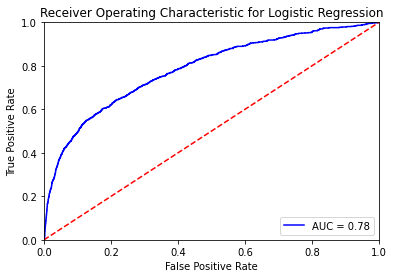

<Figure size 432x288 with 0 Axes>

In [263]:
plot_AUC(C_log,Testing_X,Testing_Y,'Logistic Regression','Log_AUC.png')

In [15]:
Pred_log=C_log.predict_proba(Test.drop('SeriousDlqin2yrs',axis=1))[:,1] # 0.79083

In [16]:
df = pd.DataFrame({'Id':np.array(range(1,len(Pred_log)+1)),'Probability':Pred_log}) 
df.to_csv("Pred_log.csv",index=False)

In [17]:
# Random Forest attempt
from sklearn.ensemble import RandomForestClassifier

In [37]:
rec1=[]
for i in range(10):
    np.random.seed(1000)
    clf=RandomForestClassifier(max_depth=3,n_estimators=100*(i+1),
                          criterion='entropy',
                          class_weight='balanced')
    score_clf=cross_val_score(clf, Train_X, Train_Y, cv=5).mean()
    rec1=rec1+[score_clf]

In [38]:
rec2=[]
for i in range(10):
    np.random.seed(1000)
    clf=RandomForestClassifier(max_depth=4,n_estimators=100*(i+1),
                          criterion='entropy',
                          class_weight='balanced')
    score_clf=cross_val_score(clf, Train_X, Train_Y, cv=5).mean()
    rec2=rec2+[score_clf]

In [39]:
rec3=[]
for i in range(10):
    np.random.seed(1000)
    clf=RandomForestClassifier(max_depth=2,n_estimators=100*(i+1),
                          criterion='entropy',
                          class_weight='balanced')
    score_clf=cross_val_score(clf, Train_X, Train_Y, cv=5).mean()
    rec3=rec3+[score_clf]

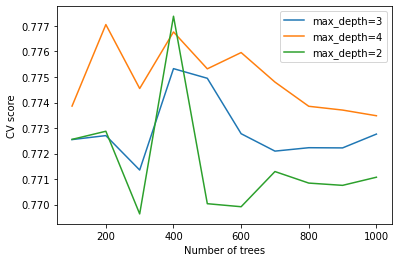

In [40]:
plt.plot(100*np.array(range(10))+100,np.array(rec1),label='max_depth=3')
plt.plot(100*np.array(range(10))+100,np.array(rec2),label='max_depth=4')
plt.plot(100*np.array(range(10))+100,np.array(rec3),label='max_depth=2')
plt.xlabel('Number of trees')
plt.ylabel('CV score')
plt.legend()
plt.savefig('RF_CV.png')

In [18]:
np.random.seed(1000)
C_rf=RandomForestClassifier(max_depth=2,n_estimators=400,
                          criterion='entropy',
                          class_weight='balanced')
C_rf=C_rf.fit(Train_X,Train_Y)
Pred2=C_rf.predict(Testing_X)

In [267]:
f1_score(Testing_Y,Pred2,average='binary')

0.31549631987268756

In [268]:
recall_score(Testing_Y,Pred2,average='binary')

0.7676669893514037

In [269]:
pd.crosstab(Testing_Y,Pred2,rownames=['True'],colnames=['Pred'])

Pred,0,1
True,,
0,10766,3201
1,240,793


In [273]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(Testing_Y, (C_rf.predict_proba(Testing_X))[:,1])
sklearn.metrics.auc(fpr, tpr)

0.8482105274977092

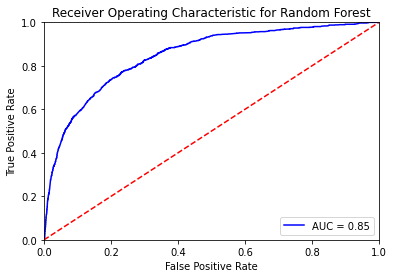

<Figure size 432x288 with 0 Axes>

In [271]:
plot_AUC(C_rf,Testing_X,Testing_Y,'Random Forest', 'RF_AUC.png')

In [19]:
Pred_rf=C_rf.predict_proba(Test.drop('SeriousDlqin2yrs',axis=1))[:,1] # 0.85792
df = pd.DataFrame({'Id':np.array(range(1,len(Pred_rf)+1)),'Probability':Pred_rf}) 
df.to_csv("Pred_rf.csv",index=False)

In [281]:
# XGBoost Method
import xgboost as xgb
XG = xgb.XGBClassifier()
param_grid={
    "n_estimators":[20*(i+1) for i in range(10)],
    "max_depth":[2,3,4,5,6,7],
    "learning_rate":[0.001,0.01,0.05,0.1],
    "scale_pos_weight":[14]
}
XG_model = RandomizedSearchCV(XG, param_distributions = param_grid, cv=5)
XG_model.fit(Train_X,Train_Y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                  

In [282]:
XG_model.best_params_

{'scale_pos_weight': 14,
 'n_estimators': 140,
 'max_depth': 3,
 'learning_rate': 0.1}

In [22]:
# XGBoost Method
import xgboost as xgb
np.random.seed(1000)
C_XG=xgb.XGBClassifier(n_estimators=140,max_depth=3,learning_rate=0.1,
                     scale_pos_weight=14)
C_XG=C_XG.fit(Train_X,Train_Y)
Pred3=C_XG.predict(Testing_X)
pd.crosstab(Testing_Y,Pred3,rownames=['True'],colnames=['Pred'])

Pred,0,1
True,,
0,11077,2890
1,238,795


In [284]:
recall_score(Testing_Y,Pred3,average='binary')

0.7696030977734754

In [285]:
f1_score(Testing_Y,Pred3,average='binary')

0.3370072064434082

In [286]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(Testing_Y, (C_XG.predict_proba(Testing_X))[:,1])
sklearn.metrics.auc(fpr, tpr)

0.8628649705421665

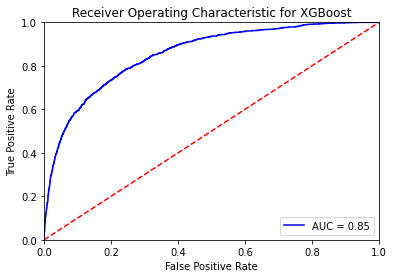

<Figure size 432x288 with 0 Axes>

In [143]:
plot_AUC(C_XG,Testing_X,Testing_Y,'XGBoost', 'XG_AUC.png')

In [23]:
Pred_XG=C_XG.predict_proba(Test.drop('SeriousDlqin2yrs',axis=1))[:,1] # 0.85134
df = pd.DataFrame({'Id':np.array(range(1,len(Pred_XG)+1)),'Probability':Pred_XG}) 
df.to_csv("Pred_XG.csv",index=False)

In [ ]:
# GradientBoosting method

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
sample_weights = np.zeros(len(Train_Y))
sample_weights[Train_Y == 0] = 1
sample_weights[Train_Y == 1] = 14

In [329]:
GB = GradientBoostingClassifier()
param_grid={
    "loss":['deviance','exponential'],
    "n_estimators":[20*(i+1) for i in range(10)],
    "learning_rate":[0.001,0.01,0.05,0.1],
}
GB_model = RandomizedSearchCV(GB, param_distributions = param_grid, cv=5)
GB_model.fit(Train_X,Train_Y,sample_weight=sample_weights)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [330]:
GB_model.best_params_

{'n_estimators': 200, 'loss': 'deviance', 'learning_rate': 0.1}

In [26]:
C_GB=GradientBoostingClassifier(n_estimators=200,loss='deviance',learning_rate=0.1)
C_GB=C_GB.fit(Train_X,Train_Y,sample_weight=sample_weights)
Pred4=C_GB.predict(Testing_X)
pd.crosstab(Testing_Y,Pred4,rownames=['True'],colnames=['Pred'])

Pred,0,1
True,,
0,11089,2878
1,241,792


In [332]:
f1_score(Testing_Y,Pred4,average='binary')

0.33680629385498617

In [333]:
recall_score(Testing_Y,Pred4,average='binary')

0.7666989351403679

In [334]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(Testing_Y, (C_GB.predict_proba(Testing_X))[:,1])
sklearn.metrics.auc(fpr, tpr)

0.863429778572934

In [27]:
Pred_GB=C_GB.predict_proba(Test.drop('SeriousDlqin2yrs',axis=1))[:,1] # 0.86052
df = pd.DataFrame({'Id':np.array(range(1,len(Pred_GB)+1)),'Probability':Pred_GB}) 
df.to_csv("Pred_GB.csv",index=False)

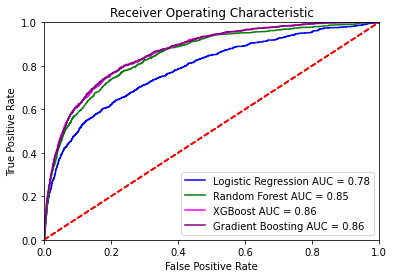

In [337]:
# ROC curves for total
model=[C_log,C_rf,C_XG,C_GB]
method=['Logistic Regression','Random Forest','XGBoost','Gradient Boosting']
color=['blue','green','magenta','purple']
expr='Receiver Operating Characteristic'
plt.title(expr)
for i in range(4):
    probs = model[i].predict_proba(Testing_X)
    preds = probs[:,1]
    fpr, tpr, threshold = sklearn.metrics.roc_curve(Testing_Y, preds)
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    
    plt.plot(fpr, tpr, 'b', label = method[i]+' AUC = %0.2f' % roc_auc,color=color[i])
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
plt.show()

In [28]:
# Now bagging
Pred_bg_prob=((C_rf.predict_proba(Testing_X))[:,1]+
              (C_log.predict_proba(Testing_X))[:,1]+
              (C_XG.predict_proba(Testing_X))[:,1]+
              (C_GB.predict_proba(Testing_X))[:,1])/4

Pred_bg=np.array([int(i>0.5) for i in Pred_bg_prob])

In [29]:
recall_score(Testing_Y,Pred_bg,average='binary')

0.744433688286544

In [30]:
f1_score(Testing_Y,Pred_bg,average='binary')

0.3396643109540636

In [31]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(Testing_Y, Pred_bg_prob)
sklearn.metrics.auc(fpr, tpr)

0.8589339094204282

In [32]:
Pred_BG=(Pred_log+Pred_rf+Pred_XG+Pred_GB)/4 #0.85490
df = pd.DataFrame({'Id':np.array(range(1,len(Pred_BG)+1)),'Probability':Pred_BG}) 
df.to_csv("Pred.csv",index=False)

In [ ]:
## Now Variance Importance

<BarContainer object of 10 artists>

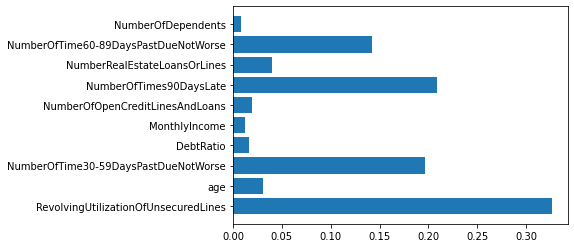

In [308]:
C_XG.feature_importances_
plt.barh(Train_X.columns, C_XG.feature_importances_)

In [36]:
# Partial Dependence Plot
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

In [38]:
feature_names=Train_X.columns
features=[0,1,2,3,4,5,6,7,8,9]

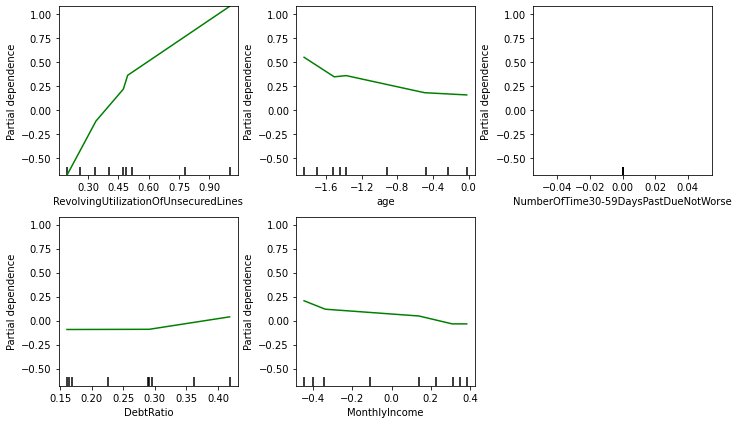

In [48]:
fig,ax = plot_partial_dependence(C_GB,       
                                   features=features[:5],
                                   X=Train_X[:5],            
                                   feature_names=feature_names, 
                                   grid_resolution=10) 
fig.set_figwidth(10)
fig.set_figheight(6)
fig.tight_layout()

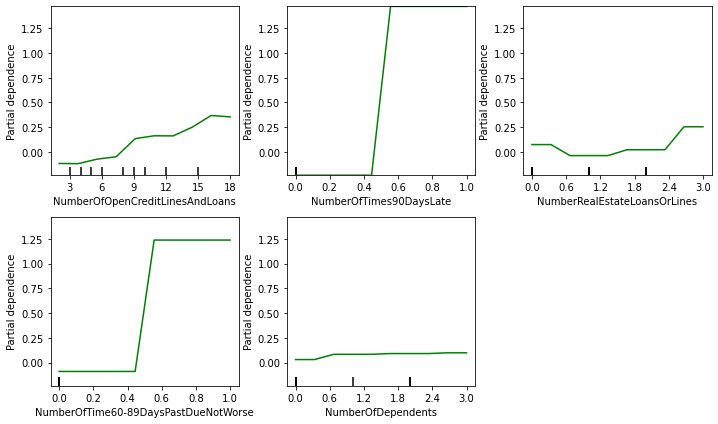

In [49]:
fig,ax = plot_partial_dependence(C_GB,       
                                   features=features[5:],
                                   X=Train_X[5:],            
                                   feature_names=feature_names, 
                                   grid_resolution=10) 
fig.set_figwidth(10)
fig.set_figheight(6)
fig.tight_layout()